In [1]:
import numpy as np
import pandas as pd
import DNN_model as dnn 

In [7]:
# Set up hyper parameters 
c = 1
layer_dims = [10, c] 
learning_rate = 0.0005
keep_prob = 1.0
num_epochs = 1000
minibatch_size = 2000
print_summary = False
isBinary = c <= 2 
hyperparams = dnn.create_hyperparameter_bundle(layer_dims, learning_rate, num_epochs, keep_prob, minibatch_size)

In [10]:
# Generate data
m = 10000
n_x = 100
label = 'Survived'
x_data = np.random.rand(m, n_x)
y_test = None

if isBinary:
    y_test = np.random.randint(2, size=(1, m))[0]
else:
    y_test = np.random.randint(c, size=(1, m))[0]

df = pd.DataFrame(x_data)
df[label] = y_test

(100, 7000)
(1, 7000)
(100, 3000)
(1, 3000)
Binary classification neural network with hyperparameters:
layer_dims: [10, 1] keep_prob: 1.0 learning_rate: 0.0005 num_epochs: 1000 minibatch_size: 2000
Training underway...
Cost after epoch 0: 0.938119
Cost after epoch 500: 0.856303


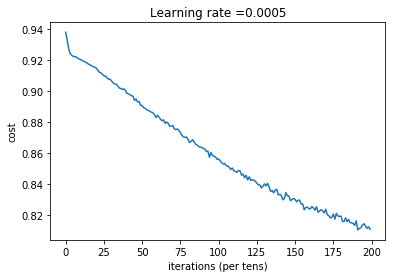

train_accuracy : 0.671571
test_accuracy : 0.502667
precision : 0.504885993485
recall : 0.514266755143
f1score : 0.509533201841
Done training!




In [11]:
# Example of using dnn.train_with_hyperparameter_bundle
model = dnn.train_with_hyperparameter_bundle(df, label, hyperparams)
parameters = model[dnn.KEY_PARAMETERS]

In [5]:
# Example of using kfold to determine best hyper parameters
hyperparams1 = dnn.create_hyperparameter_bundle(layer_dims = [c], learning_rate = 0.01, num_epochs = 500, keep_prob = 1.0)
hyperparams2 = dnn.create_hyperparameter_bundle(layer_dims = [5,c], learning_rate = 0.001, num_epochs = 500, keep_prob = 0.75)

result1 =  dnn.kfold(df, label, hyperparams1, k = 2, print_summary = False)
avg_accuracy1 = result1[dnn.KEY_AVERAGE_ACCURACY]
result2 = dnn.kfold(df, label, hyperparams2, k = 2, print_summary = False)
avg_accuracy2 = result2[dnn.KEY_AVERAGE_ACCURACY]

print "avg_accuracy1 " + str(avg_accuracy1)
print "avg_accuracy2 " + str(avg_accuracy2)

Starting K FOLD 
Training fold 1 / 2
Binary classification neural network with hyperparameters:
layer_dims: [1] keep_prob: 1.0 learning_rate: 0.01 num_epochs: 500 minibatch_size: 64
Training underway...
Done training!


Training fold 2 / 2
Binary classification neural network with hyperparameters:
layer_dims: [1] keep_prob: 1.0 learning_rate: 0.01 num_epochs: 500 minibatch_size: 64
Training underway...
Done training!


Best average accuracy: 0.523000001907
Done K FOLD


Starting K FOLD 
Training fold 1 / 2
Binary classification neural network with hyperparameters:
layer_dims: [5, 1] keep_prob: 0.75 learning_rate: 0.001 num_epochs: 500 minibatch_size: 64
Training underway...
Done training!


Training fold 2 / 2
Binary classification neural network with hyperparameters:
layer_dims: [5, 1] keep_prob: 0.75 learning_rate: 0.001 num_epochs: 500 minibatch_size: 64
Training underway...
Done training!


Best average accuracy: 0.508999988437
Done K FOLD


avg_accuracy1 0.523000001907
avg_accurac

In [6]:
p = result1[dnn.KEY_BEST_MODEL][dnn.KEY_PARAMETERS]